<a href="https://colab.research.google.com/github/AlexanderBelfort/EconomicsExperiment/blob/main/The_Economics_Notebook_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0 - Setup all necessary libraries

* sentiment analysis / data extraction modules: NLTK, vader, 
* downloading Yahoo Finance for data pulls
* plotting tools for visualization: pandas, Matplotlib, WordCloud, TextBlob, Seaborn and plotly-express





In [ ]:
#@title ⠀ {display-mode: "form"}

# install al missing libraries
!pip install pyyaml==5.4.1
!pip install yfinance

!python -m pip install https://github.com/slundberg/shap/archive/f3369c7.zip
!pip install eli5

import shap
import eli5
import yfinance as yf

# NLTK for Sentiment Analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Plotting
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Visualisation
import datetime
import time
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot
import seaborn as sns

# Normalization and more
from sklearn import preprocessing
import csv

# Counting / Regular Expressions
from collections import Counter
import re

# plots/ UI/ widgets
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from IPython.utils import io
import ipywidgets as widgets
from ipywidgets import FileUpload

#sklearn


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn import preprocessing, svm
import sklearn
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import seaborn as sn
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



warnings.simplefilter("ignore")

%pip install backtesting

!pip install gdown
import gdown


gdrive_folder_link = f'https://drive.google.com/drive/folders/13UrxQqJQrvS3LW6xpKIBka19hYNUC16W?usp=sharing'
gdown.download_folder(gdrive_folder_link, quiet=True)

url = 'https://drive.google.com/u/0/uc?id=1ThOVfTVhrgZTHs0ufv3qDZ-b3ftos-17&export=download'
output = 'Ticker_Frequency_Based_On_Months.csv'
gdown.download(url, output, quiet=False)


  Using cached https://github.com/slundberg/shap/archive/f3369c7.zip
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The twython library has not been installed. Some functionality from the twitter package will not be available.
calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Downloading...
From: https://drive.google.com/u/0/uc?id=1ThOVfTVhrgZTHs0ufv3qDZ-b3ftos-17&export=download
To: /content/Ticker_Frequency_Based_On_Months.csv
100%|██████████| 45.4k/45.4k [00:00<00:00, 20.2MB/s]


'Ticker_Frequency_Based_On_Months.csv'

## Step 1 - Analyse the preprocessed data from WallStreetBets
----------------
* WallStreetBets (WSB) is an online forum where participants discuss trading of financial securities.

* It has become notorious for its aggresive trading strategies and terminology used while trading

* This notebook has fetched submissions from WSB in order to identify ways of predicting if a stock price will go up or down.
----------------

**Example submission / Implemented as Fundamental Analysis** 

----------------
"*AAPL is going to the moon after the release of the first quarter earnings at the end of January because of all of the accessories sold throughout the year and also congressmember Nancy Pelosi is bullish on it*"

In the above example, AAPL is mentioned as a stock. There is also speculation that it will increase in price. Argumentation is provided in the submission.

----------------

**Example Price Data / Same as Default Technical Analysis in Finance**

----------------
| Date       | Ticker | Open   | High   | Low    | Close  | Volume      |
|------------|--------|--------|--------|--------|--------|-------------|
| 28/01/2022 | AAPL   | 165.71 | 170.35 | 162.80 | 170.33 | 179,935,700 |
| ...        | ...    | ...    | ...    | ...    | ...    | ...         |
| ...        | ...    | ...    | ...    | ...    | ...    | ...         |

In [ ]:
#@title ⠀ {display-mode: "form"}

df = pd.read_csv('/content/Ticker_Frequency_Based_On_Months.csv', index_col=0)
print('You have now initialised the data. Please proceed to the next step.')

You have now initialised the data. Please proceed to the next step.


## Step 2 - Review and analyse the data
* The data contains all of the submissions made on WSB for the period of **March 2021 - February 2022**

* Run the cell to review all of the stocks mentioned for our specific time period

* The timeframe chosen encompasses the popularity boom of WSB, tries to aleviate the domination of a stock called GME throughout the months of January and February 2021, and the highest inflation rate the US has had in the past 39 years as most stocks are US based.

* The figure that will appear as rectangles will show all of the stocks that have been discussed. The size of the rectangle is relative to the number of submissions.

* Each rectangle has a label (name of the stock) and a frequency measure (how many mentions there have been for this stock). This can be reviewed when you hover over any rectangle.

* The second plot shows number of submissions per month. This will help you in choosing which month you would like to analyse further in Step 3.

In [ ]:
#@title ⠀ {display-mode: "form"}

# create a new file called uploaded_filename that we will use for our initial analysis
df = pd.read_csv('/content/Ticker_Frequency_Based_On_Months.csv', index_col=0)

fig = px.treemap(df, path=['Ticker'], values='Frequency',title='Tree of Most Common Stocks For The Whole Year')
fig.show()


FEBRUARY = pd.read_csv('/content/Data Experiment/february_posts.csv', index_col = 0)
MARCH = pd.read_csv('/content/Data Experiment/march_posts.csv', index_col = 0)
APRIL = pd.read_csv('/content/Data Experiment/april_posts.csv', index_col = 0)
MAY = pd.read_csv('/content/Data Experiment/may_posts.csv', index_col = 0)
JUNE = pd.read_csv('/content/Data Experiment/june_posts.csv', index_col = 0)
JULY = pd.read_csv('/content/Data Experiment/july_posts.csv', index_col = 0)
AUGUST = pd.read_csv('/content/Data Experiment/august_posts.csv', index_col = 0)
SEPTEMBER = pd.read_csv('/content/Data Experiment/september_posts.csv', index_col = 0)
OCTOBER = pd.read_csv('/content/Data Experiment/october_posts.csv', index_col = 0)
NOVEMBER = pd.read_csv('/content/Data Experiment/november_posts.csv', index_col = 0)
DECEMBER = pd.read_csv('/content/Data Experiment/december_posts.csv', index_col = 0)
JANUARY = pd.read_csv('/content/Data Experiment/jan_posts.csv', index_col = 0)


def to_time(x):
  return datetime.datetime.fromtimestamp(x).date()


ALL_MONTHS = [FEBRUARY, MARCH, APRIL, MAY, JUNE, JULY, AUGUST, SEPTEMBER, OCTOBER, NOVEMBER, DECEMBER, JANUARY]
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']


for MONTH in ALL_MONTHS:

  #MONTH.drop('Author', inplace=True, axis=1)
  MONTH['Time'] = MONTH['Time'].apply(to_time)
  MONTH['Time'] = pd.to_datetime(MONTH['Time'])
  MONTH['month'] = MONTH['Time'].dt.month



dfs = {"April" : APRIL, "May": MAY,
       "June" : JUNE, "July": JULY,
       "August" : AUGUST, "September": SEPTEMBER,
       "October" : OCTOBER, "November": NOVEMBER,
       "December" : DECEMBER, "January": JANUARY}
      
df2 = pd.concat([FEBRUARY, MARCH, APRIL, MAY, JUNE, JULY, AUGUST, SEPTEMBER, OCTOBER, NOVEMBER, DECEMBER, JANUARY])
df2.dropna(inplace=True)
px.histogram(data_frame = df2,x='month',color='month',template='plotly_dark', title='Number of Posts Per Month')



* Run the next cell to choose how many of the top stocks you would like to perform further analysis on.


In [ ]:
#@title ⠀ {display-mode: "form"}


USER_INPUT = int(input('How many of the TOP stocks would you like to visualize? : '))

df.sort_values(by=['Frequency'], ascending=False).head(USER_INPUT)

user_choice = df.sort_values(by=['Frequency'], ascending=False).head(USER_INPUT)

print('\nFrequency Data.')

fig = px.bar(user_choice, x="Ticker", y="Frequency", text="Ticker",
             title="Frequency of Mentions For A Whole Year of the Chosen Stocks")
fig.show()

print('\nTechnical Data.')

def get_price_data(tickers_to_download):
  df_list = []
  for elem in tickers_to_download:
    price_data = yf.download(elem, start = "2021-04-01", end="2022-02-04", group_by= "Ticker", progress = False)
    price_data["Ticker"] = elem
    df_list.append(price_data)

  full_price_data_chosen_period_chosen_stocks = pd.concat(df_list)
  full_price_data_chosen_period_chosen_stocks.reset_index(inplace=True)
  return full_price_data_chosen_period_chosen_stocks

user_choice = user_choice.Ticker.tolist()
full_price_data_chosen_period_chosen_stocks = get_price_data(user_choice)
price_data_copy = full_price_data_chosen_period_chosen_stocks.copy()

fig = px.line(price_data_copy, x='Date', y="Close", color='Ticker',
              title="Daily Close Price For A Whole Year of the Chosen Stocks")
fig.show()

print('\nBy clicking on any Ticker on the legend, you can hide/show a stock.')

price_data_copy['simple_rtn'] = price_data_copy.Close.pct_change()

price_data_copy['log_rtn'] = np.log(price_data_copy.Close/price_data_copy.Close.shift(1))

fig = px.line(price_data_copy, x='Date', y="log_rtn", color='Ticker',
              title="Log Price Scale For A Whole Year of the Chosen Stocks")
fig.show()

How many of the TOP stocks would you like to visualize? : 10

Frequency Data.



Technical Data.



By clicking on any Ticker on the legend, you can hide/show a stock.


Choose a stock and review the mentions to closing price ratio in order to try and see if there might be coordinated trading or find any correlation.

Pick a Stock Name: tsla


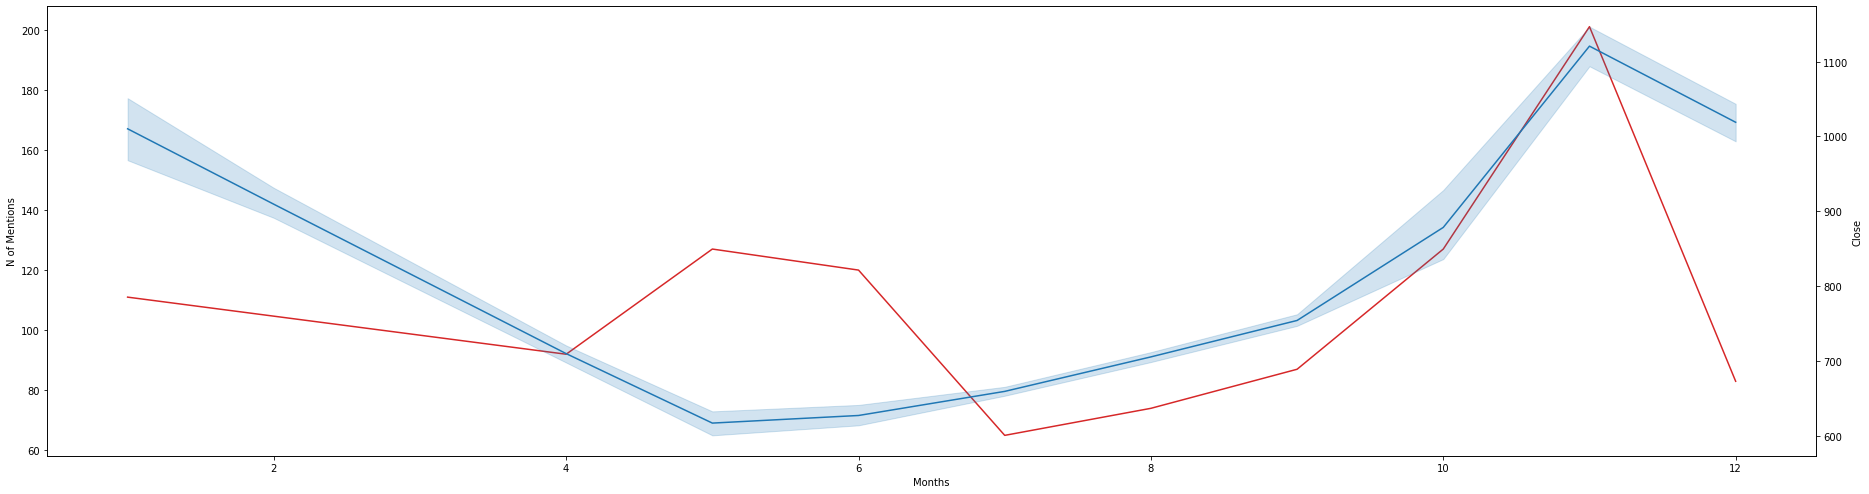


There are 1087 posts for TSLA.
The blue colored line shows the price.
The red colored line shows the submission.


In [ ]:
#@title ⠀ {display-mode: "form"}


### mentions



APRIL = pd.read_csv('/content/Data Experiment/april_posts.csv', index_col = 0)
MAY = pd.read_csv('/content/Data Experiment/may_posts.csv', index_col = 0)
JUNE = pd.read_csv('/content/Data Experiment/june_posts.csv', index_col = 0)
JULY = pd.read_csv('/content/Data Experiment/july_posts.csv', index_col = 0)
AUGUST = pd.read_csv('/content/Data Experiment/august_posts.csv', index_col = 0)
SEPTEMBER = pd.read_csv('/content/Data Experiment/september_posts.csv', index_col = 0)
OCTOBER = pd.read_csv('/content/Data Experiment/october_posts.csv', index_col = 0)
NOVEMBER = pd.read_csv('/content/Data Experiment/november_posts.csv', index_col = 0)
DECEMBER = pd.read_csv('/content/Data Experiment/december_posts.csv', index_col = 0)
JANUARY = pd.read_csv('/content/Data Experiment/jan_posts.csv', index_col = 0)

df = pd.concat([APRIL, MAY, JUNE, JULY, AUGUST, SEPTEMBER, OCTOBER, NOVEMBER, DECEMBER, JANUARY])

df.dropna(inplace=True)

day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

def to_time(x):
  return datetime.datetime.fromtimestamp(x).date()

df['Time'] = df['Time'].apply(to_time)
df['Time'] = pd.to_datetime(df['Time'])
df['date'] = df['Time'].dt.day
df['weekday'] = df['Time'].dt.weekday
df['weekday']=df['weekday'].apply(lambda x: day_name[x])
df['month'] = df['Time'].dt.month


def get_ticker_data(symbol, start_date, end_date):

    ticker = yf.Ticker(symbol)

    df_fin = ticker.history(period="1d", start=start_date, end=end_date)
    df_fin = df_fin[["Open", "High", "Low", "Close", "Volume"]]

    return df_fin

ticker = str(input('Pick a Stock Name: ').upper())
# ticker = user_choice
start_date = "2021-04-01"
end_date = "2022-02-04"

color = 'tab:red'

a4_dims = (31.7, 8.27)

wsb_ticker = df[df['Selftext'].str.contains(ticker)]
yfinance_ticker = get_ticker_data(ticker, start_date, end_date)

yfinance_ticker['day'] = pd.DatetimeIndex(yfinance_ticker.index).day
yfinance_ticker['month'] = pd.DatetimeIndex(yfinance_ticker.index).month

fig, ax1 = plt.subplots(figsize=a4_dims)

sns.lineplot(data=wsb_ticker.month.value_counts(), ax=ax1, color=color)

ax2 = ax1.twinx()

sns.lineplot(data=yfinance_ticker, x="month", y="Close", ax=ax2)


ax1.set(xlabel='Months', ylabel='N of Mentions')

plt.show()

print(f'\nThere are {wsb_ticker.Selftext.shape[0]} posts for {ticker}.\nThe blue colored line shows the price.\nThe red colored line shows the submission.')

Choose another stock and review the mentions to closing price ratio in order to try and see if there might be coordinated trading or find any correlation.

Pick a Stock Name: amc


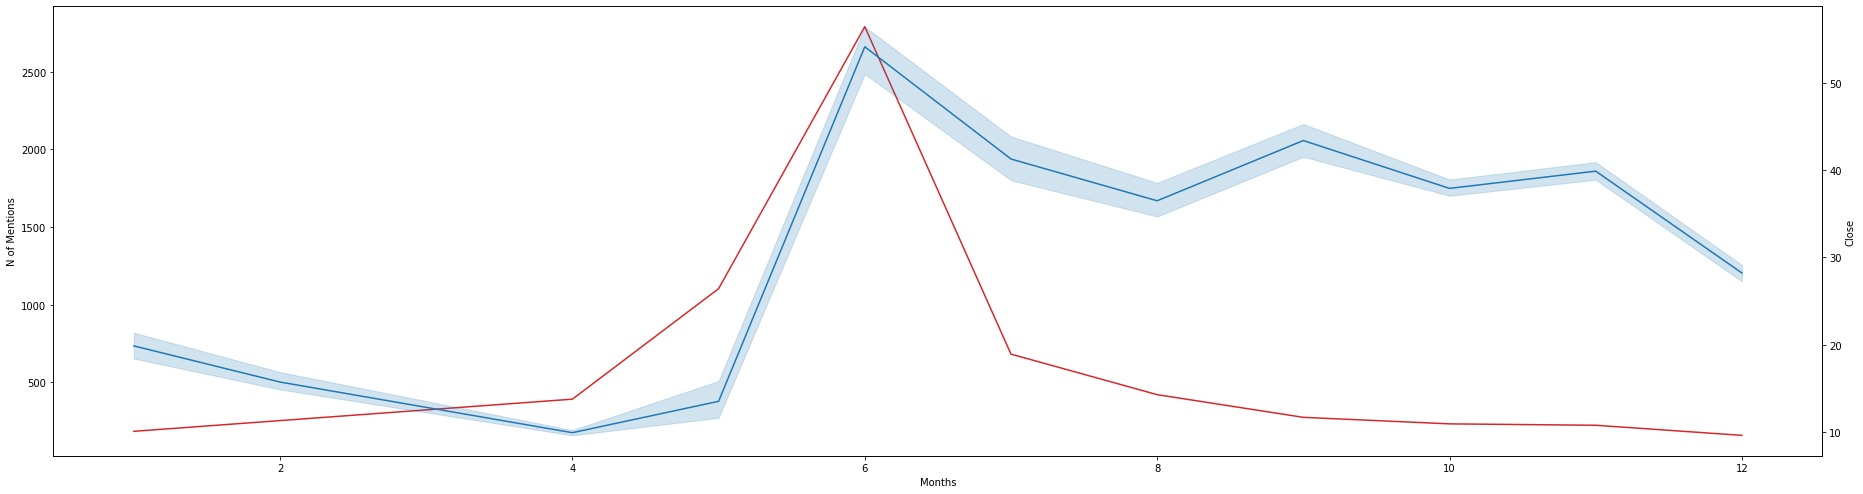


There are 6463 posts for AMC.
The blue colored line shows the price.
The red colored line shows the submission.


In [ ]:
#@title ⠀ {display-mode: "form"}


### mentions



APRIL = pd.read_csv('/content/Data Experiment/april_posts.csv', index_col = 0)
MAY = pd.read_csv('/content/Data Experiment/may_posts.csv', index_col = 0)
JUNE = pd.read_csv('/content/Data Experiment/june_posts.csv', index_col = 0)
JULY = pd.read_csv('/content/Data Experiment/july_posts.csv', index_col = 0)
AUGUST = pd.read_csv('/content/Data Experiment/august_posts.csv', index_col = 0)
SEPTEMBER = pd.read_csv('/content/Data Experiment/september_posts.csv', index_col = 0)
OCTOBER = pd.read_csv('/content/Data Experiment/october_posts.csv', index_col = 0)
NOVEMBER = pd.read_csv('/content/Data Experiment/november_posts.csv', index_col = 0)
DECEMBER = pd.read_csv('/content/Data Experiment/december_posts.csv', index_col = 0)
JANUARY = pd.read_csv('/content/Data Experiment/jan_posts.csv', index_col = 0)

df = pd.concat([APRIL, MAY, JUNE, JULY, AUGUST, SEPTEMBER, OCTOBER, NOVEMBER, DECEMBER, JANUARY])

df.dropna(inplace=True)

day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

def to_time(x):
  return datetime.datetime.fromtimestamp(x).date()

df['Time'] = df['Time'].apply(to_time)
df['Time'] = pd.to_datetime(df['Time'])
df['date'] = df['Time'].dt.day
df['weekday'] = df['Time'].dt.weekday
df['weekday']=df['weekday'].apply(lambda x: day_name[x])
df['month'] = df['Time'].dt.month


def get_ticker_data(symbol, start_date, end_date):

    ticker = yf.Ticker(symbol)

    df_fin = ticker.history(period="1d", start=start_date, end=end_date)
    df_fin = df_fin[["Open", "High", "Low", "Close", "Volume"]]

    return df_fin

ticker = str(input('Pick a Stock Name: ').upper())
# ticker = user_choice
start_date = "2021-04-01"
end_date = "2022-02-04"

color = 'tab:red'

a4_dims = (31.7, 8.27)

wsb_ticker = df[df['Selftext'].str.contains(ticker)]
yfinance_ticker = get_ticker_data(ticker, start_date, end_date)

yfinance_ticker['day'] = pd.DatetimeIndex(yfinance_ticker.index).day
yfinance_ticker['month'] = pd.DatetimeIndex(yfinance_ticker.index).month

fig, ax1 = plt.subplots(figsize=a4_dims)

sns.lineplot(data=wsb_ticker.month.value_counts(), ax=ax1, color=color)

ax2 = ax1.twinx()

sns.lineplot(data=yfinance_ticker, x="month", y="Close", ax=ax2)

ax1.set(xlabel='Months', ylabel='N of Mentions')

plt.show()

print(f'\nThere are {wsb_ticker.Selftext.shape[0]} posts for {ticker}.\nThe blue colored line shows the price.\nThe red colored line shows the submission.')

## Step 3 - Choose your month 

* Select a month you would like to investigate for further analysis

* By clicking on the legend, you can show/hide days of the week. 

* The X-axis shows the dates for the month chosen and the count on the Y-axis shows number of submissions for that day. 

* Hovering over any of the bars shows the actual date and submission count, where the color is the day of the week as shown on the legend on the right side of the plot.

* Ignore the months of February and March as they are heavily censored and deleted

In [ ]:
#@title ⠀ {display-mode: "form"}

APRIL = pd.read_csv('/content/Data Experiment/april_posts.csv', index_col = 0)
MAY = pd.read_csv('/content/Data Experiment/may_posts.csv', index_col = 0)
JUNE = pd.read_csv('/content/Data Experiment/june_posts.csv', index_col = 0)
JULY = pd.read_csv('/content/Data Experiment/july_posts.csv', index_col = 0)
AUGUST = pd.read_csv('/content/Data Experiment/august_posts.csv', index_col = 0)
SEPTEMBER = pd.read_csv('/content/Data Experiment/september_posts.csv', index_col = 0)
OCTOBER = pd.read_csv('/content/Data Experiment/october_posts.csv', index_col = 0)
NOVEMBER = pd.read_csv('/content/Data Experiment/november_posts.csv', index_col = 0)
DECEMBER = pd.read_csv('/content/Data Experiment/december_posts.csv', index_col = 0)
JANUARY = pd.read_csv('/content/Data Experiment/jan_posts.csv', index_col = 0)


def to_time(x):
  return datetime.datetime.fromtimestamp(x).date()


ALL_MONTHS = [APRIL, MAY, JUNE, JULY, AUGUST, SEPTEMBER, OCTOBER, NOVEMBER, DECEMBER, JANUARY]
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']


for MONTH in ALL_MONTHS:

  #MONTH.drop('Author', inplace=True, axis=1)
  MONTH['Time'] = MONTH['Time'].apply(to_time)
  MONTH['Time'] = pd.to_datetime(MONTH['Time'])
  MONTH['date'] = MONTH['Time'].dt.day
  MONTH['weekday'] = MONTH['Time'].dt.weekday
  MONTH['weekday']=MONTH['weekday'].apply(lambda x: day_name[x])


dfs = {"April" : APRIL, "May": MAY,
       "June" : JUNE, "July": JULY,
       "August" : AUGUST, "September": SEPTEMBER,
       "October" : OCTOBER, "November": NOVEMBER,
       "December" : DECEMBER, "January": JANUARY}
      
# create histogram for whichever month you want to choose to explore
user_input = input('Please select your month: ').upper()

df = pd.DataFrame(eval(user_input))

px.histogram(data_frame = df,x='date',color='weekday',template='plotly_dark')


Please select your month: may


Check the post to price to mean absolute variation ratio for that month on a specific stock from any of the top stocks that you chose that you will want to predict.

STOCK NAME: amc

On the first plot you see number of mentions
for the stock on the WSB forum
for each day of the month chosen.

On the second plot you see closing price for each day of the month chosen


On the third plot you see mean absolute variation on close.

Mean Absolute variation or deviation
measures the accuracy of the prediction
by averaging the alleged error in forecasting.




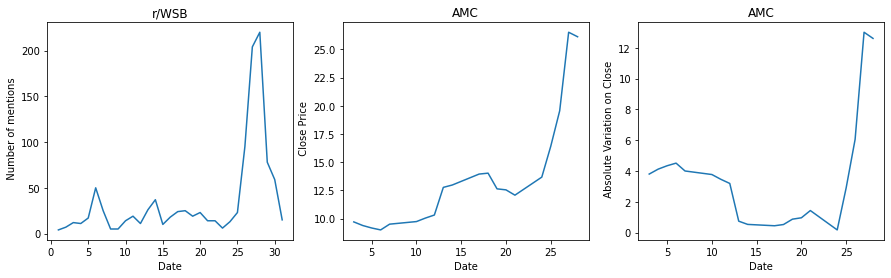

In [ ]:
#@title ⠀ {display-mode: "form"}

def get_ticker_data(symbol, start_date, end_date):

    ticker = yf.Ticker(symbol)

    df_fin = ticker.history(period="1d", start=start_date, end=end_date)
    df_fin = df_fin[["Open", "High", "Low", "Close", "Volume"]]

    return df_fin

ticker = str(input('STOCK NAME: ').upper())
# ticker = user_choice
monthh = user_input
df.dropna(inplace=True)

start_date = ""
end_date = ""


if monthh == 'APRIL':
  start_date = "2021-04-01"
  end_date = "2021-04-30"

elif monthh == 'MAY':
  start_date = "2021-05-01"
  end_date = "2021-05-31"

elif monthh == 'JUNE':
  start_date = "2021-06-01"
  end_date = "2021-06-30"

elif monthh == 'JULY':
  start_date = "2021-07-01"
  end_date = "2021-07-31"

elif monthh == 'AUGUST':
  start_date = "2021-08-01"
  end_date = "2021-08-31"

elif monthh == 'SEPTEMBER':
  start_date = "2021-09-01"
  end_date = "2021-09-30"

elif monthh == 'OCTOBER':
  start_date = "2021-10-01"
  end_date = "2021-10-31"

elif monthh == 'NOVEMBER':
  start_date = "2021-11-01"
  end_date = "2021-11-30"

elif monthh == 'DECEMBER':
  start_date = "2021-12-01"
  end_date = "2021-12-31"

elif monthh == 'JANUARY':
  start_date = "2022-01-01"
  end_date = "2022-01-31"

ludiq = ticker

wsb_ticker = df[df['Selftext'].str.contains(ticker)]
yfinance_ticker = get_ticker_data(ticker, start_date, end_date)
yfinance_ticker['day'] = pd.DatetimeIndex(yfinance_ticker.index).day

x = yfinance_ticker.Close.mean()
X = yfinance_ticker[["day","Close"]]
X["Close"] = abs(X.Close - x)


fig, axs = plt.subplots(ncols=3, figsize=(15, 4))
sns.lineplot(data=wsb_ticker.date.value_counts(), ax=axs[0])
sns.lineplot(data=yfinance_ticker, x="day", y="Close", ax=axs[1])
sns.lineplot(data=X, x="day", y="Close", ax=axs[2])

axs[0].set(xlabel='Date', ylabel='  Number of mentions', title='r/WSB')
axs[1].set(xlabel='Date', ylabel='  Close Price', title=ticker+'')
axs[2].set(xlabel='Date', ylabel='  Absolute Variation on Close', title=ticker+'')

fig.show()

print('\nOn the first plot you see number of mentions\nfor the stock on the WSB forum\nfor each day of the month chosen.')
print('\nOn the second plot you see closing price for each day of the month chosen')
print('\n\nOn the third plot you see mean absolute variation on close.')
print('\nMean Absolute variation or deviation\nmeasures the accuracy of the prediction\nby averaging the alleged error in forecasting.\n\n')

* Review Sentiment for the chosen month

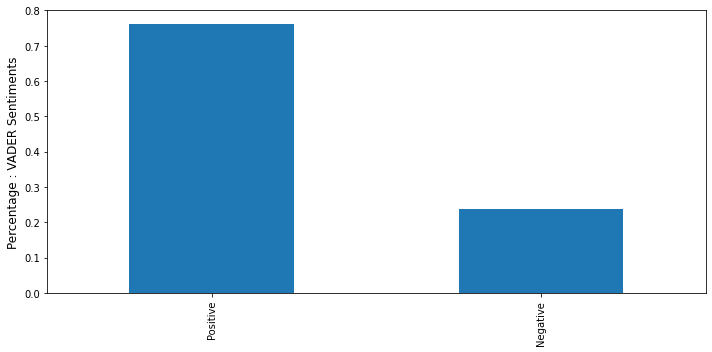

In [ ]:
#@title ⠀ {display-mode: "form"}


def wc_generate(data, title=""):
    text = " ".join(i for i in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp","GME" ,"AMC" ,"CLOV" ,"BB" ,"WISH" ,"TSLA", "UWMC" ,"AMD", "PLTR", "RH", "U", "removed", "preview", "redd", "webp", "png", "format", "width"])

    wordcloud = WordCloud(stopwords=stopwords, 
                          scale=4, 
                          max_font_size=50,
                          max_words=337,
                          background_color="white").generate(text)

    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()



df.dropna(inplace=True)

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"      

vader_sentiments = df.Selftext.apply(find_sentiment)
df['vader-sentiment'] = vader_sentiments

df = df[df['vader-sentiment'].str.contains('Neutral')==False]
counts = df['vader-sentiment'].value_counts()
percent = counts/sum(counts)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))


percent.plot(kind='bar', ax=ax1)

ax1.set_ylabel('Percentage : VADER Sentiments', size=12)
plt.tight_layout()
plt.show()

* The next cell will break down the month sentiment into days. This way, one can spot trading anomalies and also how positively and negatively predisposed people were each day.

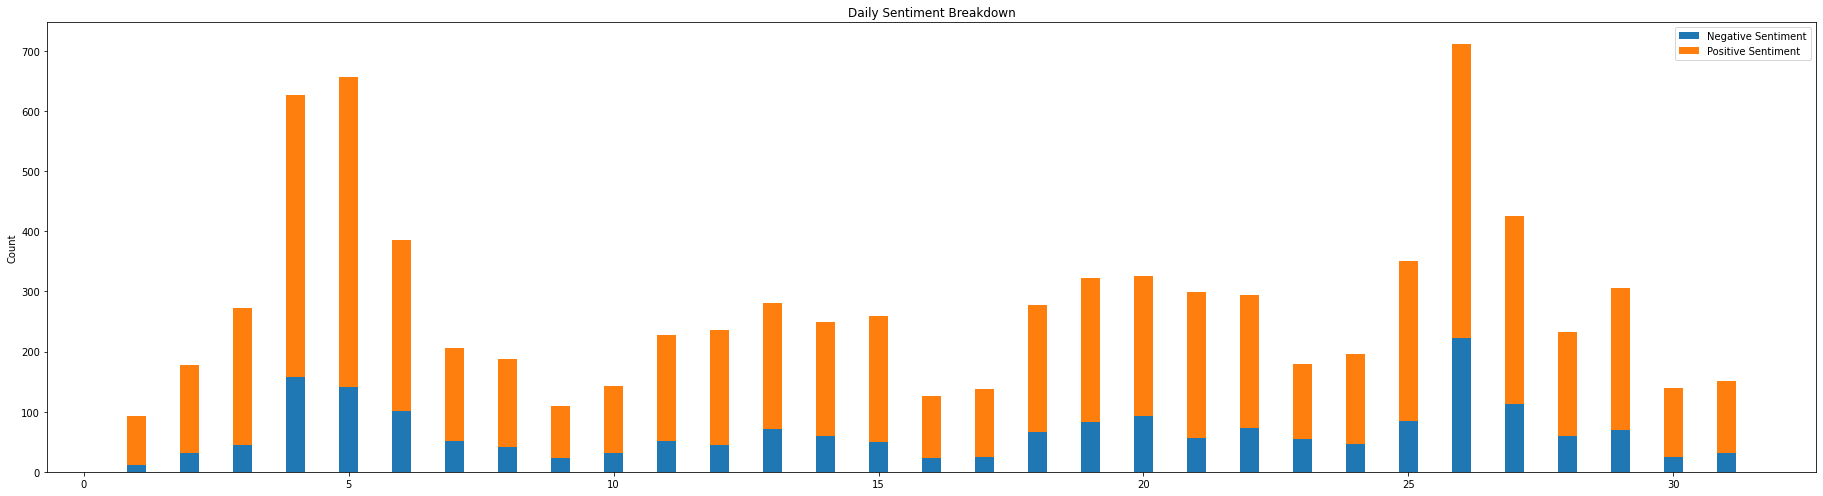

In [ ]:
#@title ⠀ {display-mode: "form"}

pos_df = pd.DataFrame(data = df[df['vader-sentiment'] == 'Positive'])
neg_df = pd.DataFrame(data = df[df['vader-sentiment'] == 'Negative'])

a4_dims = (31.7, 8.27)
labels = pos_df['date'].unique().tolist()

width = 0.35 

fig, ax = plt.subplots(figsize=a4_dims)

ax.bar(labels, neg_df['date'].groupby([df.date]).agg('count'), width, label='Negative Sentiment')
ax.bar(labels, pos_df['date'].groupby([df.date]).agg('count'), width, bottom=neg_df['date'].groupby([df.date]).agg('count'),
       label='Positive Sentiment')

ax.set_ylabel('Count')
ax.set_title('Daily Sentiment Breakdown')
ax.legend()
plt.show()

* The following cells will show two word clouds, one that is positive and shows all positive words for your chosen month, and one that is negative and shows the negative words for your chosen month.

* Write 5 positive words you expect to see in a WordCloud

* Review the positive word WordCloud

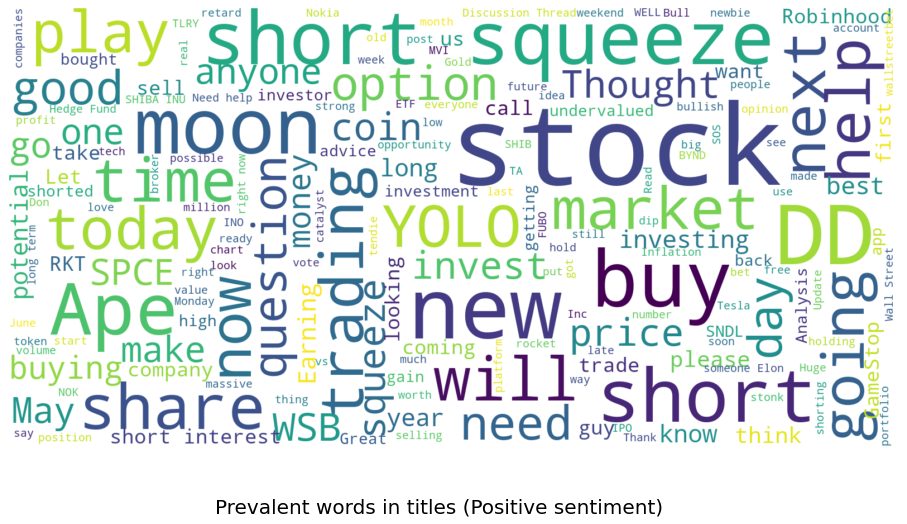

In [ ]:
#@title ⠀ {display-mode: "form"}

wc_generate(df.loc[df['vader-sentiment']=='Positive', 'Title'], title = 'Prevalent words in titles (Positive sentiment)')

* Write 5 negative words you expect to see in a WordCloud

* Review the negative word WordCloud

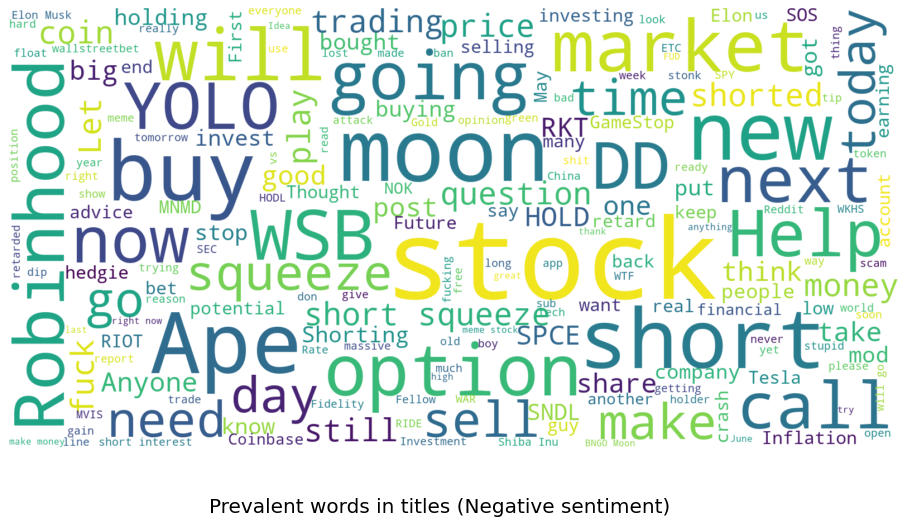

In [ ]:
#@title ⠀ {display-mode: "form"}

wc_generate(df.loc[df['vader-sentiment']=='Negative', 'Title'], title = 'Prevalent words in titles (Negative sentiment)')

## Step 4 - Initialise predictions


* Run this cell to see the model predictions for all of the stocks found in the frequency analysis for the timeline outlined in Step 1.

In [ ]:
#@title ⠀ {display-mode: "form"}

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data1 = pd.read_csv("/content/Data Experiment/no_na_data.csv")
data1["Date"] =  pd.to_datetime(data1["Date"])
data1.set_index(["Date", "Ticker"], inplace=True)
X_data = data1[["Mentions",
                "Score",
                "YOLO", 
                "Meme",
                "DD",
                "News", 
                "Gain", 
                "Loss", 
                "Technical Analysis",
                "% Open-1", "% Open-3", "% Open-7",
                "% Low-1", "% Low-3", "% Low-7",
                "% High-1", "% High-3", "% High-7",
                "% Close-1", "% Close-3", "% Close-7", 
                "% Volume-1",  "% Volume-3", "% Volume-7"
                ]]

y = data1["Label+1"]
scaler = sklearn.preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_data)

X, y = shuffle(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train_df = pd.DataFrame(X_train, columns = X_data.columns)
X_test_df = pd.DataFrame(X_test, columns = X_data.columns)

clf=RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

pred_ticker_list = y_test.reset_index()["Ticker"].unique()
#pred_ticker_list = y_test["Ticker"].unique()

prices_list = []
for ticker in pred_ticker_list:
  stock_price_data = yf.download(ticker, start="2021-01-01", end="2022-01-30", progress = False)
  stock_price_data["Ticker"] = ticker
  prices_list.append(stock_price_data)


prices_df = pd.concat(prices_list)

prices_df.reset_index(inplace=True)
prices_df.set_index(["Date", "Ticker"], inplace = True)

predictions_df = y_test.to_frame()
predictions_df.reset_index(inplace=True)
predictions_df.set_index(["Date"], inplace=True)
predictions_df["Predictions"] = y_pred


y_actual_all = predictions_df['Label+1']
y_pred_all = predictions_df['Predictions']
confusion_matrix(y_actual_all, y_pred_all)
true_positive = confusion_matrix(y_actual_all, y_pred_all)[1][1]
true_negative = confusion_matrix(y_actual_all, y_pred_all)[0][0]


false_positive = confusion_matrix(y_actual_all, y_pred_all)[1][0]
false_negative = confusion_matrix(y_actual_all, y_pred_all)[0][1]


from sklearn.metrics import accuracy_score
x = accuracy_score(y_actual_all, y_pred_all)


print('-------------------------')
print(f'The model predicted that\nthe price will go up correctly on {true_positive} occasions, which accounts to {(true_positive/(true_positive+false_positive))*100:.2f}% accuracy\non all positive predictions.')
print('-------------------------')
print(f'The model predicted that\nthe price will go down correctly on {true_negative} occasions, which accounts to {(true_negative/(true_negative+false_negative))*100:.2f}% accuracy\non all negative predictions.')
print('-------------------------')
print(f'The model made an overall of {predictions_df.shape[0]} predictions. \nThe model accuracy is {x*100:.2f}%.')
print('-------------------------')
predictions_df


1 Failed download:
- NAKD: No data found, symbol may be delisted

1 Failed download:
- VIAC: No data found, symbol may be delisted

1 Failed download:
- SPRT: No data found, symbol may be delisted

1 Failed download:
- WPG: No data found, symbol may be delisted

1 Failed download:
- SCR: No data found, symbol may be delisted
-------------------------
The model predicted that
the price will go up correctly on 449 occasions, which accounts to 61.34% accuracy
on all positive predictions.
-------------------------
The model predicted that
the price will go down correctly on 629 occasions, which accounts to 70.28% accuracy
on all negative predictions.
-------------------------
The model made an overall of 1627 predictions. 
The model accuracy is 66.26%.
-------------------------


,Ticker,Label+1,Predictions
Date,,,
2021-06-12,GOED,1,0
2021-03-29,NEW,0,0
2021-07-02,R,0,0
2021-05-17,TLRY,1,1
2021-06-09,AMC,0,0
...,...,...,...
2021-07-27,SAVA,1,0
2021-06-14,ME,0,1
2021-08-10,PLTR,0,0


## Step 5.1 - Compare predictions for your stock


* Predict whether your stock went up for the timeframe chosen in the beginning of this project

* Compare with the actual Label

In [ ]:
#@title ⠀ {display-mode: "form"}


testing = predictions_df[predictions_df['Ticker'].str.contains(ludiq)]

y_actual = testing['Label+1']
y_pred = testing['Predictions']
confusion_matrix(y_actual, y_pred)

true_positive = confusion_matrix(y_actual, y_pred)[1][1]
true_negative = confusion_matrix(y_actual, y_pred)[0][0]

false_positive = confusion_matrix(y_actual, y_pred)[1][0]
false_negative = confusion_matrix(y_actual, y_pred)[0][1]

x = accuracy_score(y_actual, y_pred)
print('-------------------------')
print(f'The model predicted that\nthe price will go up correctly on {true_positive} occasions, which accounts to {(true_positive/(true_positive+false_positive))*100:.2f}% accuracy\non all positive predictions.')
print('-------------------------')
print(f'The model predicted that\nthe price will go down correctly on {true_negative} occasions, which accounts to {(true_negative/(true_negative+false_negative))*100:.2f}% accuracy\non all negative predictions.')
print('-------------------------')
print(f'The model made {testing.shape[0]} predictions for {ludiq} with accuracy of {x*100:.2f}%.')
print('-------------------------')

testing

-------------------------
The model predicted that
the price will go up correctly on 6 occasions, which accounts to 66.67% accuracy
on all positive predictions.
-------------------------
The model predicted that
the price will go down correctly on 6 occasions, which accounts to 60.00% accuracy
on all negative predictions.
-------------------------
The model made 19 predictions for AMC with accuracy of 63.16%.
-------------------------


,Ticker,Label+1,Predictions
Date,,,
2021-06-09,AMC,0,0
2021-04-19,AMC,0,1
2021-05-28,AMC,0,0
2021-04-06,AMC,0,0
2021-05-18,AMC,0,1
2021-05-06,AMC,1,0
2021-07-16,AMC,0,0
2021-03-05,AMC,1,1
2021-04-21,AMC,1,1


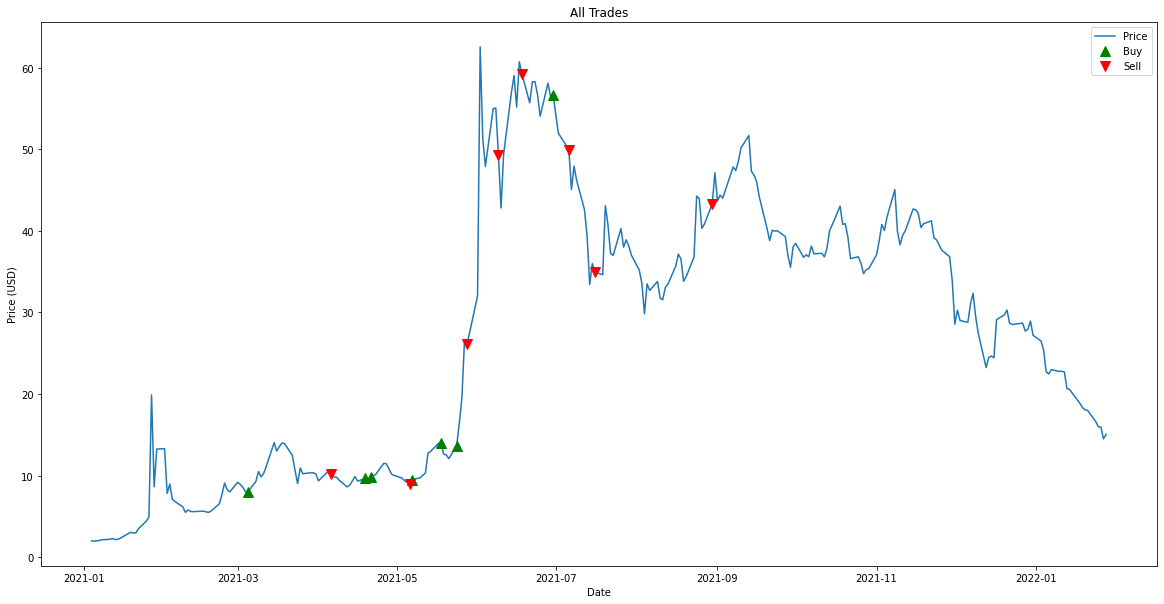

In [ ]:
#@title ⠀ {display-mode: "form"}

def generate_plot_with_points():

  merged_df = predictions_df.merge(prices_df, how = 'left', on = ['Date', 'Ticker'])

  price_and_prediction_df = merged_df[merged_df['Ticker'].str.contains(ludiq)]
  price_and_prediction_df.dropna(inplace=True)

  buys = price_and_prediction_df.loc[price_and_prediction_df["Predictions"] == 1]
  sells = price_and_prediction_df.loc[price_and_prediction_df["Predictions"] == 0]  

  amc_testing = prices_df.reset_index(level=['Date', 'Ticker'])

  amc_testing = amc_testing[amc_testing['Ticker'].str.contains(ludiq)]

  
  plt.figure(figsize=(20,10))

  plt.plot(amc_testing.Date, amc_testing['Close'], label='Price')


  plt.plot(buys.index, price_and_prediction_df.loc[buys.index]['Close'], '^', markersize=10, color='g', lw=2., label='Buy');
  # down arrow when we sell one share
  plt.plot(sells.index, price_and_prediction_df.loc[sells.index]['Close'], 'v', markersize = 10, color='r', lw=2., label='Sell');


  plt.ylabel('Price (USD)'); plt.xlabel('Date');
  plt.title('All Trades'); plt.legend(loc='best');
  plt.show()


generate_plot_with_points()

## Step 5.2 - Compare predictions for your stock and your month

* Predict whether your stock went up or down for your chosen month 

In [ ]:
#@title ⠀ {display-mode: "form"}

testing.reset_index(level=0, inplace=True)
testing['Month'] = testing.Date.dt.month_name()

monthh = monthh.title()

month_predictions = testing.loc[testing['Month'] == monthh.title()]

y_actual_chosen = testing['Label+1'].loc[testing['Month'] == monthh.title()]
y_pred_chosen = testing['Predictions'].loc[testing['Month'] == monthh.title()]
confusion_matrix(y_actual_chosen, y_pred_chosen)


true_positive_chosen = confusion_matrix(y_actual_chosen, y_pred_chosen)[1][1]
true_negative_chosen = confusion_matrix(y_actual_chosen, y_pred_chosen)[0][0]

false_positive_chosen = confusion_matrix(y_actual_chosen, y_pred_chosen)[1][0]
false_negative_chosen = confusion_matrix(y_actual_chosen, y_pred_chosen)[0][1]


from sklearn.metrics import accuracy_score
x = accuracy_score(y_actual_chosen, y_pred_chosen)
print('-------------------------')

print(f'The model predicted that\nthe price will go up correctly on {true_positive_chosen} occasions, which accounts to {(true_positive_chosen/(true_positive_chosen+false_positive_chosen))*100:.2f}% accuracy\non all positive predictions.')
print('-------------------------')
print(f'The model predicted that\nthe price will go down correctly on {true_negative_chosen} occasions, which accounts to {(true_negative_chosen/(true_negative_chosen+false_negative_chosen))*100:.2f}% accuracy\non all negative predictions.')
print('-------------------------')
print(f'The model made {month_predictions.shape[0]} predictions for {ludiq} for the chosen month. \nThe model accuracy is {x}.')
print('-------------------------')

month_predictions

-------------------------
The model predicted that
the price will go up correctly on 2 occasions, which accounts to 66.67% accuracy
on all positive predictions.
-------------------------
The model predicted that
the price will go down correctly on 1 occasions, which accounts to 50.00% accuracy
on all negative predictions.
-------------------------
The model made 5 predictions for AMC for the chosen month. 
The model accuracy is 0.6.
-------------------------


,Date,Ticker,Label+1,Predictions,Month
2,2021-05-28,AMC,0,0,May
4,2021-05-18,AMC,0,1,May
5,2021-05-06,AMC,1,0,May
9,2021-05-07,AMC,1,1,May
15,2021-05-24,AMC,1,1,May


* As investors might not be ready to fully automate trading, it is important to gain insight into how these predictions were made by Artificial Intelligence.

* One technique is known as Feature Importance, refering to a way that a model calculates scores for all of the input features of the dataset (or columns).

* A higher score means the specific feature will have a larger impact on the model when predicting our variables

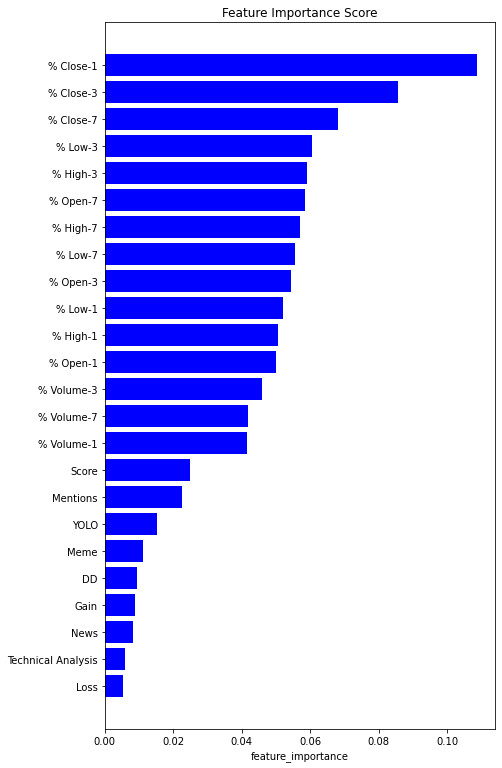


The model put its highest importance values on the following features
: ('% Close-1', '% Close-3', '% Close-7', '% Low-3', '% High-3') which are price indicators 


The model put its lowest importance values on the following features
: ('Loss', 'Technical Analysis', 'News', 'Gain', 'DD') which are sentiment indicators


These specific fundamental and technical details need to be noted.
They are worth considering when creating your own predictions.


In [ ]:
#@title ⠀ {display-mode: "form"}

features = X_data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7, 13))
plt.title('Feature Importance Score')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('feature_importance')

plt.show()

testa = [(features[i], importances[i]) for i in indices]
#df.columns = 
new = pd.DataFrame(testa)
new.columns = ['Feature', 'Importance']
sorted = new.sort_values(by='Importance', ascending = False).head(5)
#sorted

lowest = new.sort_values(by='Importance', ascending = True).head(5)
#lowest

print(f'\nThe model put its highest importance values on the following features\n: {sorted.iloc[0][0], sorted.iloc[1][0], sorted.iloc[2][0], sorted.iloc[3][0], sorted.iloc[4][0]} which are price indicators \n')
print(f'\nThe model put its lowest importance values on the following features\n: {lowest.iloc[0][0], lowest.iloc[1][0], lowest.iloc[2][0], lowest.iloc[3][0], lowest.iloc[4][0]} which are sentiment indicators\n')
print('\nThese specific fundamental and technical details need to be noted.\nThey are worth considering when creating your own predictions.')


* The second technique used to explain the output is called SHAP and is based on Game Theory, a popular concept in Economics, created by Lloyd Shapley, a Nobel Prize winning Economist.

* It shows how important were these features based on the two classes (Class 1 - price going up and Class 2 - price going down)

* SHAP assumes that each feature is a player in a game where the prediction is the payout

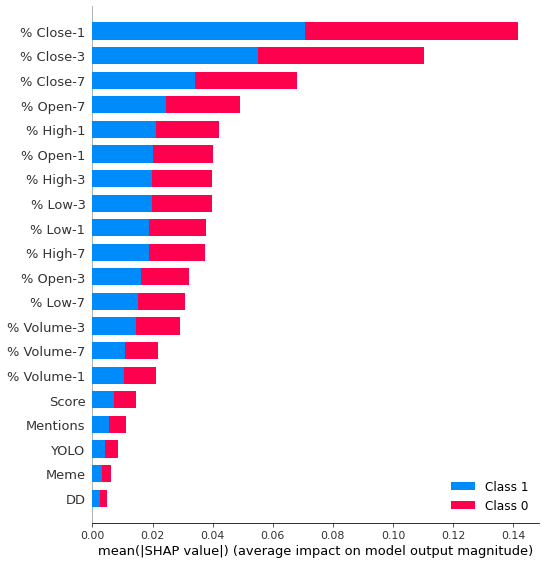

In [ ]:
#@title ⠀ {display-mode: "form"}

import shap 
explainer = shap.TreeExplainer(clf)  
shap_values = explainer.shap_values(X_train_df)
shap.summary_plot(shap_values, X_test_df, feature_names=X_test_df.columns, plot_type="bar")

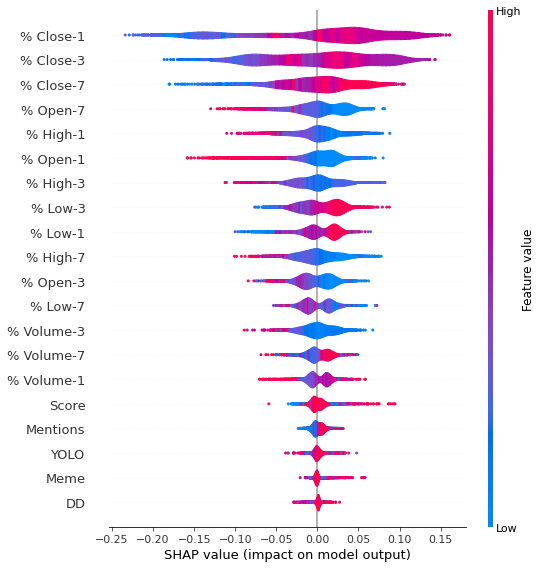

In [ ]:
#@title ⠀ {display-mode: "form"}

shap.summary_plot(shap_values[1], features=X_train_df, feature_names=X_test_df.columns, plot_type="violin")


* Feature Importance Based on Score Decrease when Feature is Unavailable, also known as Mean Decrease Accuracy

----

This graph summarizes how much accuracy the model loses when certain variables are excluded. 

The greater the loss, the more significant the variable is for successfully classifying an object. 

The variables are listed in descending importance.

In [ ]:
#@title ⠀ {display-mode: "form"}

from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf).fit(X_test, y_test)
perm.feature_names = list(X_data.columns.values)
eli5.show_weights(perm, feature_names=perm.feature_names)

Weight,Feature
0.0757 ± 0.0181,% Close-1
0.0483 ± 0.0093,% Close-3
0.0440 ± 0.0076,% Close-7
0.0251 ± 0.0051,% High-1
0.0230 ± 0.0164,% High-7
0.0173 ± 0.0071,% Open-1
0.0146 ± 0.0095,% High-3
0.0104 ± 0.0070,% Low-1
0.0092 ± 0.0121,% Open-7
0.0085 ± 0.0077,% Volume-3
